### Importing required libraries

In [1]:
!pip install wordcloud

In [2]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import regular expression
import re

# import ast
import ast

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import statsmodels
import statsmodels.api as sma

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import wordlcoud, stopwords
from wordcloud import WordCloud,STOPWORDS


In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [8,8]

# Creating custom color
colors = ['#97C1A9','#DCDCDC','#AFC197','#9AC197','#97C1BE','#97C1A2','#C1979A',
          '#A997C1','#77AE8F','#DCDCDC','#67A481','#C197AF']

### Reading the dataset and viewing the first 10 rows of it

In [4]:
pd.set_option('display.max_columns',20)

In [5]:
df_hotel = pd.read_csv('Hotel Reservations.csv')
df_hotel.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### Checking the shape/dimension of the dataset¶

In [6]:
print(f'The dataset has {df_hotel.shape[0]} rows and {df_hotel.shape[1]} columns')

The dataset has 36275 rows and 19 columns


In [7]:
print(f'Dimension of the dataset is {df_hotel.ndim}')

Dimension of the dataset is 2


### Checking the datatype, number of non null values and name of each variable in the dataset

In [8]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Checking for the missing values. Displaying number of missing values per column

In [9]:
missing_values = pd.DataFrame({'No of missing values': df_hotel.isnull().sum(),
                              '% of missing values': (df_hotel.isnull().sum()/df_hotel.shape[0])*100}
                             ).reset_index().rename(columns = {'index':'Name'})

missing_values

,Name,No of missing values,% of missing values
0,Booking_ID,0,0.0
1,no_of_adults,0,0.0
2,no_of_children,0,0.0
3,no_of_weekend_nights,0,0.0
4,no_of_week_nights,0,0.0
5,type_of_meal_plan,0,0.0
6,required_car_parking_space,0,0.0
7,room_type_reserved,0,0.0
8,lead_time,0,0.0
9,arrival_year,0,0.0


From above dataframe we can see that there are no missing values present in the dataset

### Dropping of irrelevant columns from the dataset

The variable booking id is a unqiue identfier of each booking. This variable can be dropped as it might not contribute much to the prediction booking status or might impute noise to the model.

In [10]:
df_hotel.drop(columns = 'Booking_ID', inplace = True)

### Checking for the descriptive statistics of the dataset

In [11]:
df_hotel.describe(include = 'object').T

,count,unique,top,freq
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [12]:
df_hotel.shape

(36275, 18)

In [13]:
round(df_hotel['booking_status'].value_counts(normalize=True)*100)

Not_Canceled    67.0
Canceled        33.0
Name: booking_status, dtype: float64

### Checking for the summary statistics of the dataset

In [14]:
df_hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Univariate Analysis

#### Type_of_meal_plan

This variable explain the type of meal plan booked by the customer

In [15]:
plt.rcParams['figure.figsize'] = [5,5]

df_hotel['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

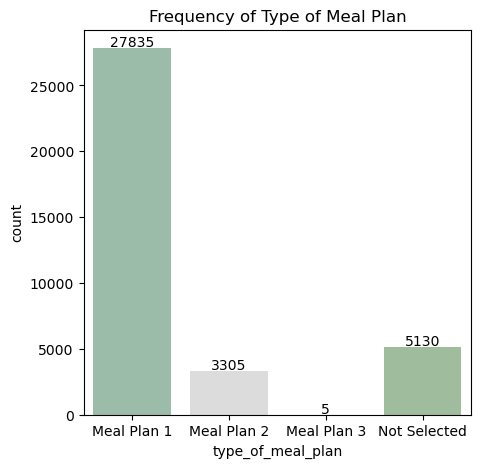

In [16]:
sns.countplot(df_hotel['type_of_meal_plan'].sort_values(),palette = colors)
plt.title('Frequency of Type of Meal Plan')
# plt.savefig("Frequency of Type of Meal Plan.jpeg")

for i,v in enumerate(df_hotel['type_of_meal_plan'].value_counts().sort_index()):
    plt.text( x = i , y = v + 100, s = v, ha = 'center')
    
plt.savefig("Frequency of Type of Meal Plan.jpeg")

Inference:

From above countplot it is clearly evident that meal plan 1 is prefered by most of the customers. It is followed by not selected and meal plan 2 with count of 5130 and 3305. Only a few customer prefer meal plan 3

#### Room_type_reserved

It explains the type of room reserved by the customer.

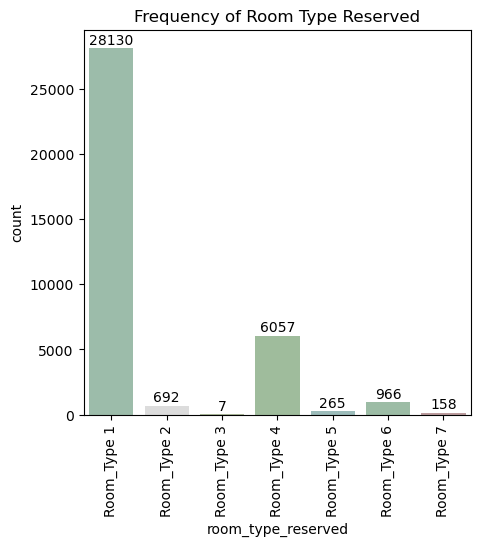

In [17]:
sns.countplot(df_hotel['room_type_reserved'].sort_values(),palette= colors)
plt.title('Frequency of Room Type Reserved')
plt.xticks(rotation = 90)

for i,v in enumerate(df_hotel['room_type_reserved'].value_counts().sort_index()):
    plt.text( x = i , y = v + 300, s = v, ha = 'center')

plt.savefig("Frequency of Room Type Reserved.jpeg")

In [18]:
df_hotel.groupby(["room_type_reserved"])["avg_price_per_room"].mean()

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64

#### Market_segment_type

The "Market Segment" refers to the designation or classification of the source of the booking made by the guest. It is a categorical variable that provides information about the type of customer or entity that made the reservation.

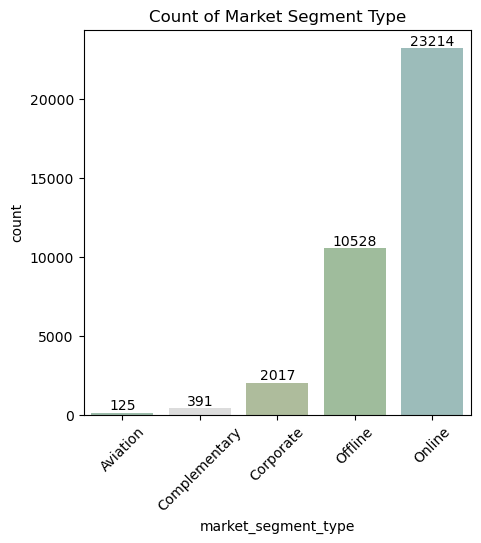

In [19]:
sns.countplot(df_hotel['market_segment_type'].sort_values(),palette= colors)
plt.title('Count of Market Segment Type')
plt.xticks(rotation = 45)

for i,v in enumerate(df_hotel['market_segment_type'].value_counts().sort_index()):
    plt.text( x = i , y = v + 200, s = v, ha = 'center')
    
plt.savefig('Count of Market Segment Type.jpeg')

Inference: 

From above plot it is clearly evident that customers who reserved rooms through online modes is higher compared to other modes of reservation.
The industry is driven by the online bookings offlate, and more thoughts on the cancellation of online cancellation should be given a thought

#### No_of_adults

The "number of adults" refers to the number of guests over the age of 18 who will be occupying a hotel room

In [20]:
df_hotel['no_of_adults'].unique()

array([2, 1, 3, 0, 4], dtype=int64)

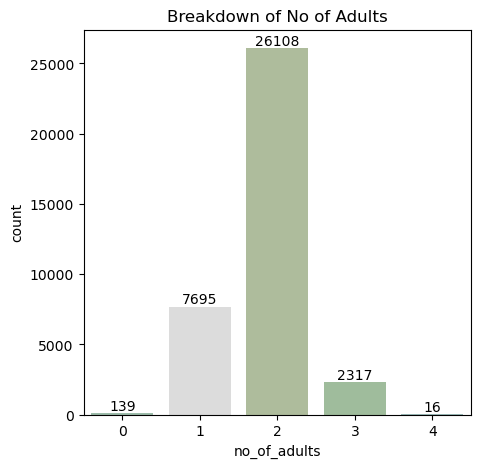

In [21]:
sns.countplot(df_hotel['no_of_adults'].sort_values(),palette = colors)
plt.title('Breakdown of No of Adults')

for i,v in enumerate(df_hotel['no_of_adults'].value_counts().sort_index()):
    plt.text( x = i , y = v + 200, s = v, ha = 'center')

plt.savefig("Breakdown of No of Adults.jpeg")

#### No_of_children

The "number of children" refers to the number of guests below the age of 18 who will be occupying a hotel room

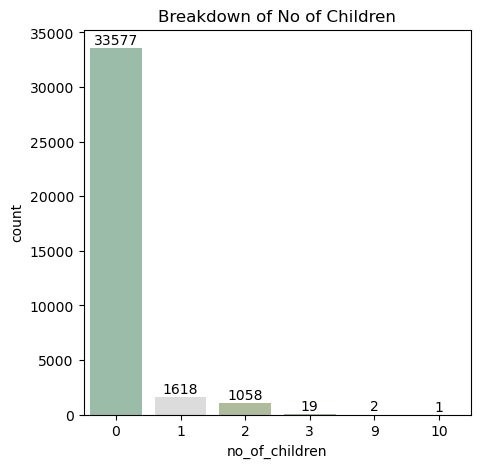

In [22]:
sns.countplot(df_hotel['no_of_children'].sort_values(),palette = colors)
plt.title('Breakdown of No of Children')

for i,v in enumerate(df_hotel['no_of_children'].value_counts().sort_index()):
    plt.text( x = i , y = v + 350, s = v, ha = 'center')

plt.savefig("Breakdown of No of Children.jpeg")

#### No_of_weekend_nights

The "no_of_weekend_nights" variable refers to the number of weekend nights (i.e., Saturday, or Sunday nights) that a guest will be staying at the hotel as part of their reservation. 

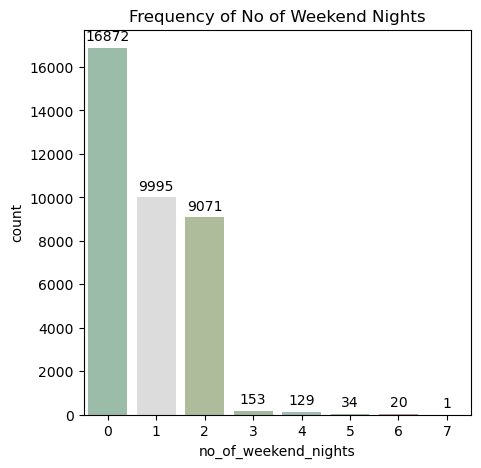

In [23]:
sns.countplot(df_hotel['no_of_weekend_nights'].sort_values(),palette = colors)
plt.title('Frequency of No of Weekend Nights')

for i,v in enumerate(df_hotel['no_of_weekend_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 350, s = v, ha = 'center')
    
plt.savefig("Frequency of No of Weekend Nights.jpeg")

#### No_of_week_nights

It is the number of weekday nights (i.e., Monday to Friday nights) that a guest will be staying at the hotel as part of their reservation.

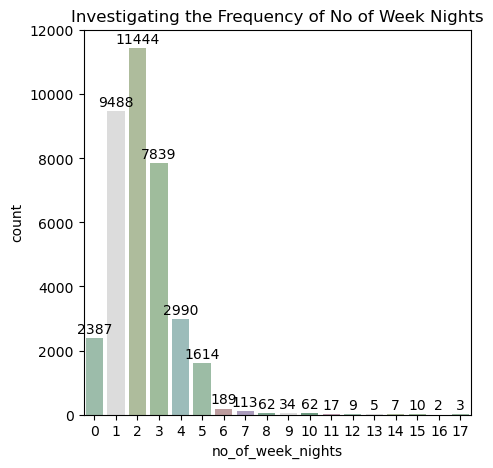

In [24]:
sns.countplot(df_hotel['no_of_week_nights'].sort_values(),palette = colors)
plt.title('Investigating the Frequency of No of Week Nights')

for i,v in enumerate(df_hotel['no_of_week_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
plt.savefig("Investigating the Frequency of No of Week Nights.jpeg")

#### Lead_time

It is the amount of time between when a guest makes a reservation and when their planned arrival date at the hotel is. It is a measure of how much advance notice the hotel has before the guest arrives.

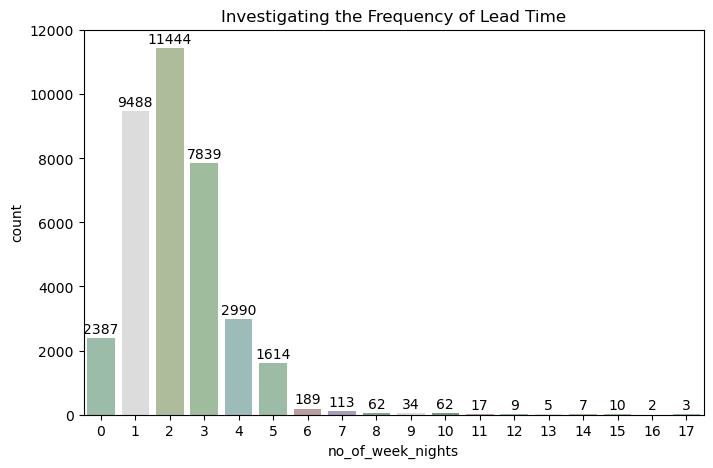

In [25]:
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot(df_hotel['no_of_week_nights'].sort_values(),palette = colors)
plt.title('Investigating the Frequency of Lead Time')

for i,v in enumerate(df_hotel['no_of_week_nights'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')

plt.savefig("Investigating the Frequency of Lead Time.jpeg")

#### Arrival_year

"Arrival year" refers to the year in which a guest is scheduled to arrive for their reservation at a hotel. 

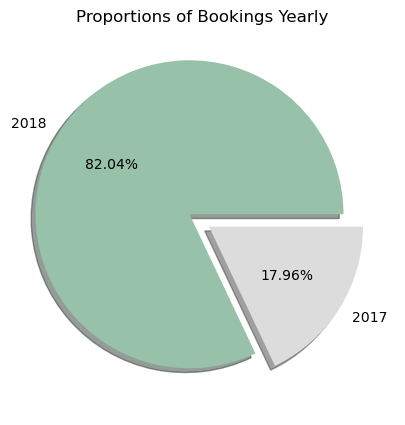

In [26]:
plt.pie(df_hotel['arrival_year'].value_counts(), labels = df_hotel['arrival_year'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.1,0.05],colors = colors)
plt.title('Proportions of Bookings Yearly')


plt.savefig("Proportions of Bookings Yearly.jpeg")

plt.show()

Inference: 
The given data Set is dominated by the 2018 data, or the bookings have boosted high in the year 2018

#### Arrival_month

"Arrival month" refers to the month in which a guest is scheduled to arrive for their reservation at a hotel.

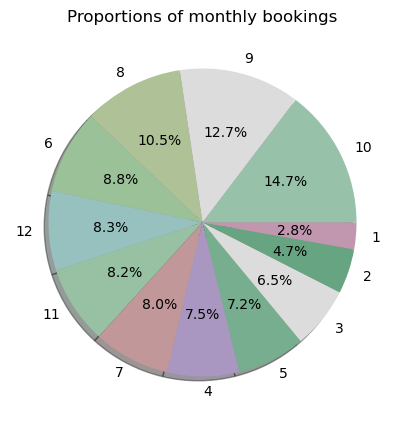

In [27]:
plt.pie(df_hotel['arrival_month'].value_counts(), labels = df_hotel['arrival_month'].value_counts().index,
        autopct = '%.1f%%', shadow = True,colors = colors )
plt.title('Proportions of monthly bookings')

plt.savefig('Proportions of monthly bookings.jpeg')
plt.show()

Inference: 
8,9,10 has the highest no bookings. which is August, September and November. So in the financial year perspective 2nd and 3rd has the highest footfall / bookings
There is a scope for feature engineering  for this column, to bin the months quarter wise or bin it season wise to establish better pattern with the target variable


#### Repeated_guest

This variable explains whether a guest who made a hotel reservation has stayed at the same hotel before.

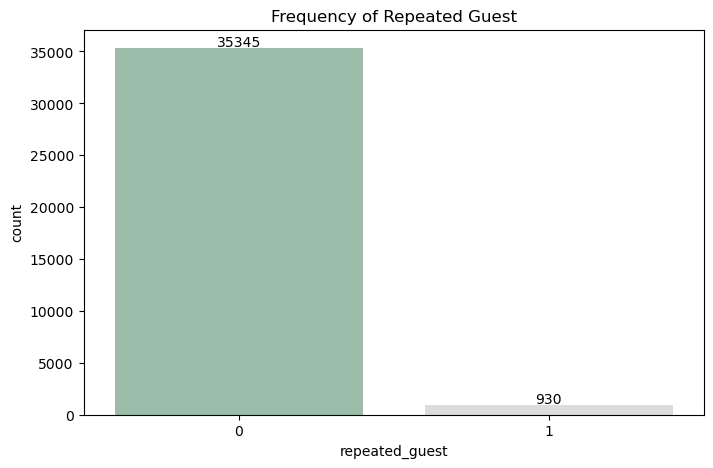

In [28]:
plt.rcParams["figure.figsize"] = [8,5]
sns.countplot(df_hotel['repeated_guest'].sort_values(),palette = colors)
plt.title('Frequency of Repeated Guest')

for i,v in enumerate(df_hotel['repeated_guest'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')

plt.savefig("Frequency of Repeated Guest.jpeg")

#### No_of_previous_cancellations

"No of previous cancellations" refers to the number of times a guest has previously cancelled a reservation at the hotel

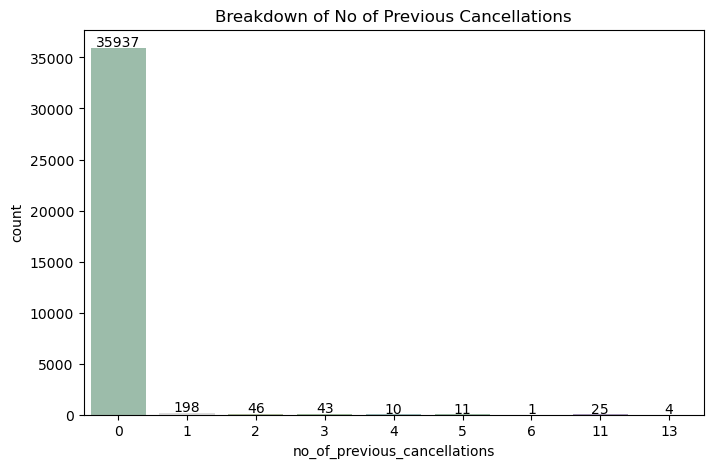

In [29]:
sns.countplot(df_hotel['no_of_previous_cancellations'].sort_values(),palette = colors)
plt.title('Breakdown of No of Previous Cancellations')

for i,v in enumerate(df_hotel['no_of_previous_cancellations'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
    
plt.savefig("Breakdown of No of Previous Cancellations.jpeg")

#### Avg_price_per_room

Average price per day of the reservation; prices of the rooms are dynamic. (in Dollars)

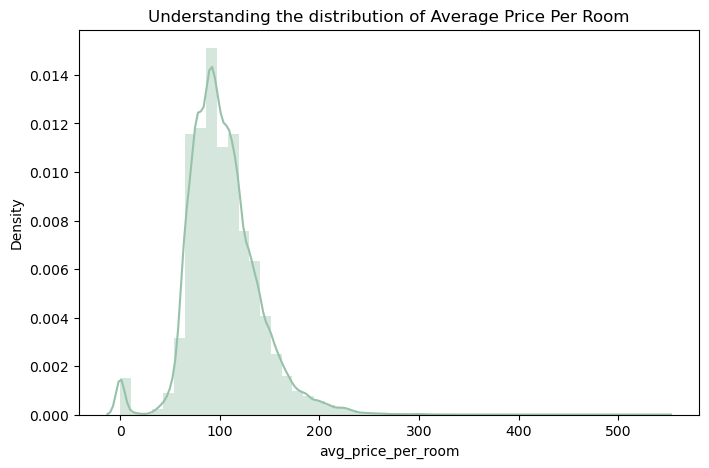

In [30]:
sns.distplot(df_hotel['avg_price_per_room'], color = '#97C1A9')
plt.title('Understanding the distribution of Average Price Per Room')
plt.show()

#### No_of_special_requests

The "Number of special requests" in the Hotel Reservations dataset refers to the number of additional services or special requests made by a guest when booking a hotel reservation. 

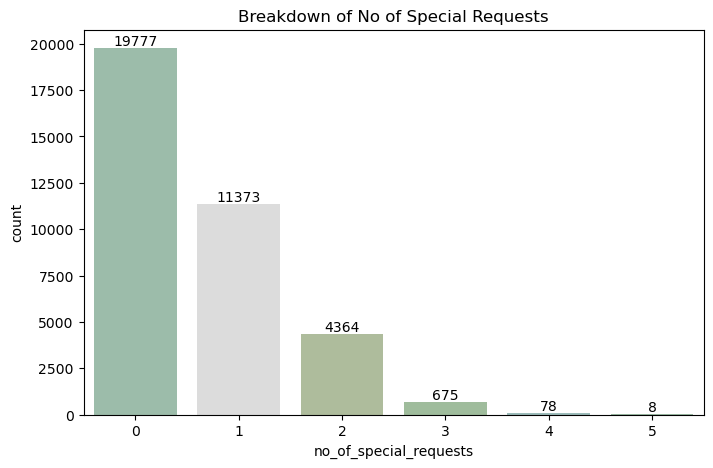

In [31]:
sns.countplot(df_hotel['no_of_special_requests'].sort_values(),palette = colors)
plt.title('Breakdown of No of Special Requests')

for i,v in enumerate(df_hotel['no_of_special_requests'].value_counts().sort_index()):
    plt.text( x = i , y = v + 150, s = v, ha = 'center')
    
plt.savefig('Breakdown of No of Special Requests.jpeg')

In [32]:
round(df_hotel["no_of_special_requests"].value_counts(normalize= True)*100)

0    55.0
1    31.0
2    12.0
3     2.0
4     0.0
5     0.0
Name: no_of_special_requests, dtype: float64

#### Booking_status

Flag indicating if the booking was canceled or not. This is the target variable

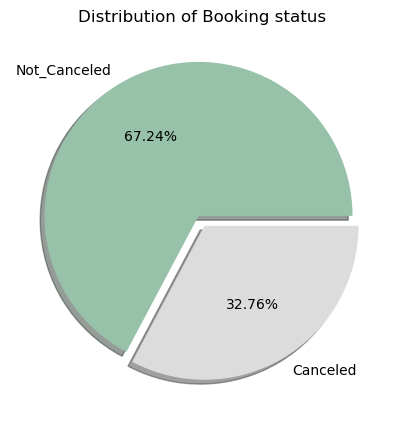

In [33]:
plt.pie(df_hotel['booking_status'].value_counts(), labels = df_hotel['booking_status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.05,0.025],colors = colors)
plt.title('Distribution of Booking status')
plt.savefig('Distribution of Booking status.jpeg')
plt.show()


From the above distribution it is clearly evident that there is class imbalance in the target variable

### Bivariate Analysis

#### Avg_price_per_room vs Booking_status

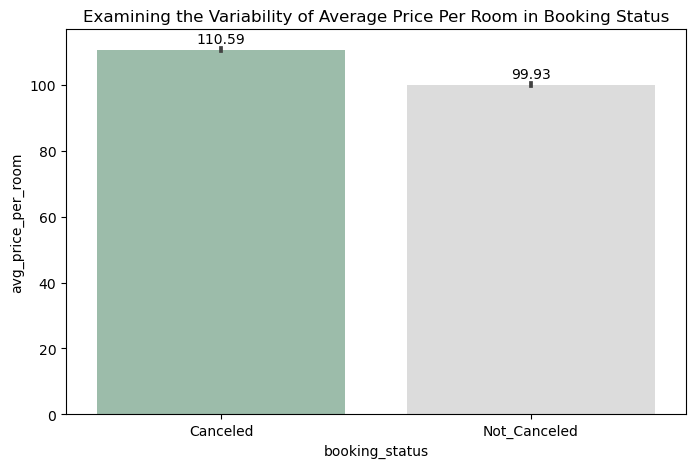

In [34]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['avg_price_per_room'],palette= colors)
plt.title('Examining the Variability of Average Price Per Room in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 2, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Booking Status.jpeg")

#### No_of_week_nights vs Booking_status

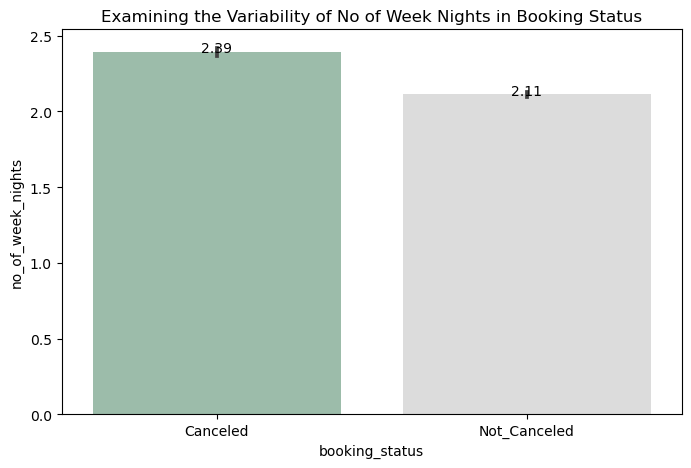

In [35]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['no_of_week_nights'],palette = colors)
plt.title('Examining the Variability of No of Week Nights in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_week_nights'].mean(),2)):
    plt.text(x = i , y = v , s = v , ha = 'center')
    
plt.savefig('Examining the Variability of No of Week Nights in Booking Status.jpeg')

Inference: 
This plot can help us visualize how booking status varies with the length of the stay. For example, we might find that bookings with longer weeknight stays are more likely to result in a cancellation

#### No_of_adults vs Booking_status

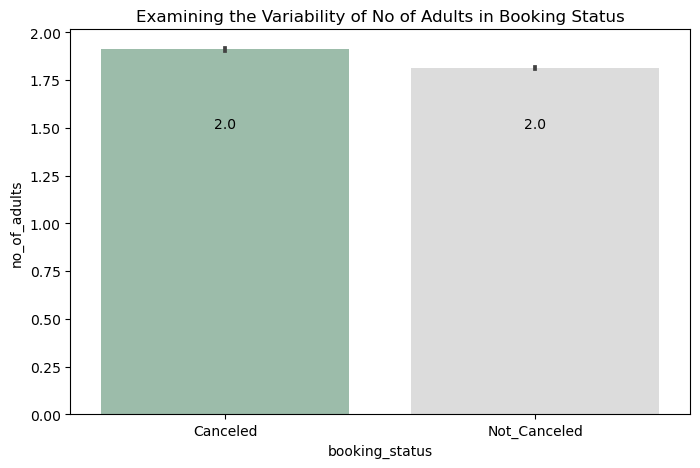

In [36]:
sns.barplot(x = df_hotel['booking_status'].sort_values(), y = df_hotel['no_of_adults'], palette = colors)
plt.title('Examining the Variability of No of Adults in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_adults'].mean())):
    plt.text(x = i , y = v - 0.5, s = v , ha = 'center')
    
plt.savefig('Examining the Variability of No of Adults in Booking Status.jpeg')

#### Type_of_meal_plan vs Booking_status

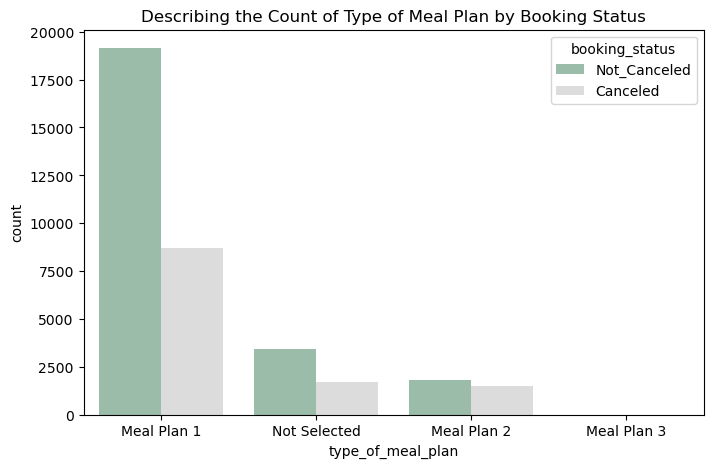

In [37]:
sns.countplot(x = df_hotel['type_of_meal_plan'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Type of Meal Plan by Booking Status')
plt.savefig('Describing the Count of Type of Meal Plan by Booking Status.jpeg')
plt.show()

#### Repeated_guest vs Booking_status

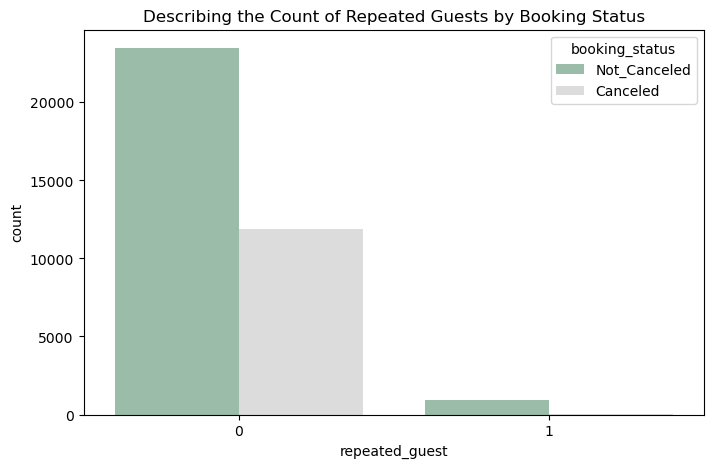

In [38]:
sns.countplot(x = df_hotel['repeated_guest'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Repeated Guests by Booking Status')
plt.savefig("Describing the Count of Repeated Guests by Booking Status.jpeg")
plt.show()

#### No_of_weekend_nights vs Booking_status

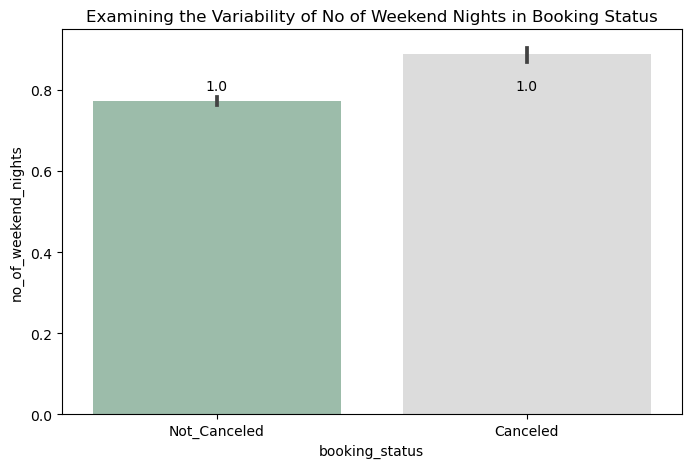

In [39]:
sns.barplot(x = df_hotel['booking_status'] , y = df_hotel['no_of_weekend_nights'],palette = colors)
plt.title('Examining the Variability of No of Weekend Nights in Booking Status')

for i,v in enumerate(round(df_hotel.groupby('booking_status')['no_of_weekend_nights'].mean())):
    plt.text(x = i , y = v - 0.2, s = v , ha = 'center')

plt.savefig("Examining the Variability of No of Weekend Nights in Booking Status.jpeg")

#### Room_type_reserved vs Booking_status

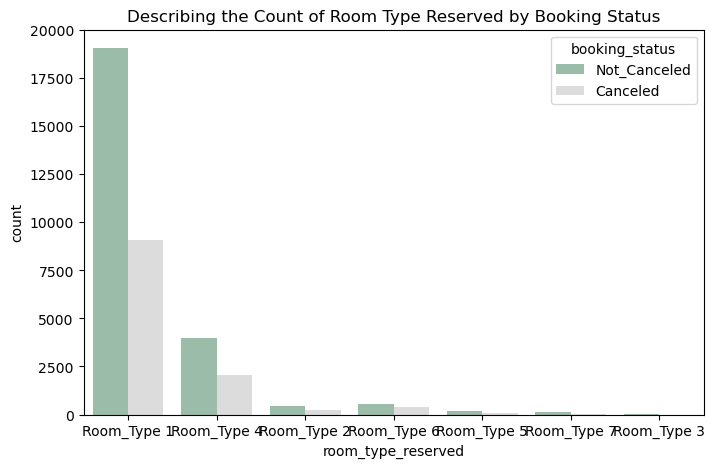

In [40]:
sns.countplot(x = df_hotel['room_type_reserved'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Describing the Count of Room Type Reserved by Booking Status')
plt.savefig("Describing the Count of Room Type Reserved by Booking Status.jpeg")
plt.show()

#### Required_car_parking_space vs Avg_price_per_room

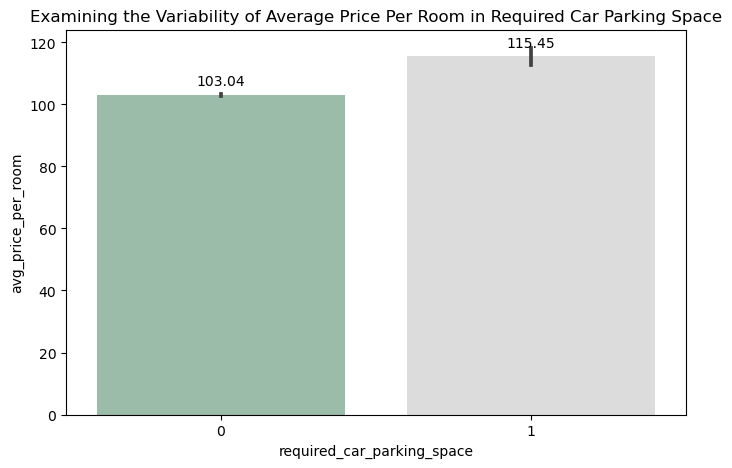

In [41]:
sns.barplot(x = df_hotel['required_car_parking_space'] , y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Examining the Variability of Average Price Per Room in Required Car Parking Space')

for i,v in enumerate(round(df_hotel.groupby('required_car_parking_space')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 3, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Required Car Parking Space.jpeg")

#### Type_of_meal_plan vs Avg_price_per_room

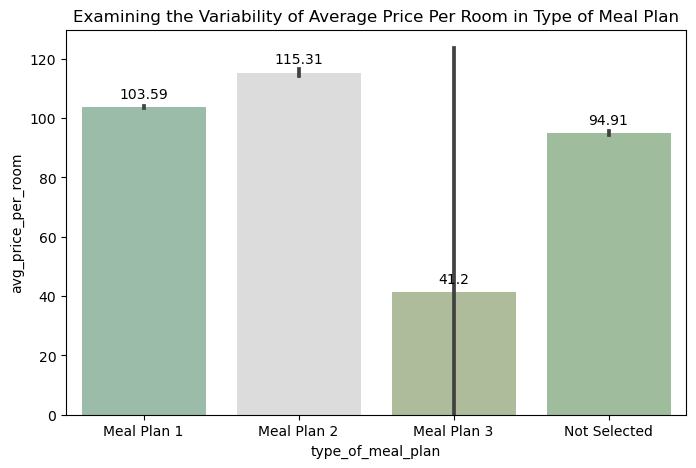

In [42]:
sns.barplot(x = df_hotel['type_of_meal_plan'].sort_values() , y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Examining the Variability of Average Price Per Room in Type of Meal Plan')

for i,v in enumerate(round(df_hotel.groupby('type_of_meal_plan')['avg_price_per_room'].mean(),2)):
    plt.text(x = i , y = v + 3, s = v , ha = 'center')
    
plt.savefig("Examining the Variability of Average Price Per Room in Type of Meal Plan.jpeg")

#### Market_segment_type vs Booking_status

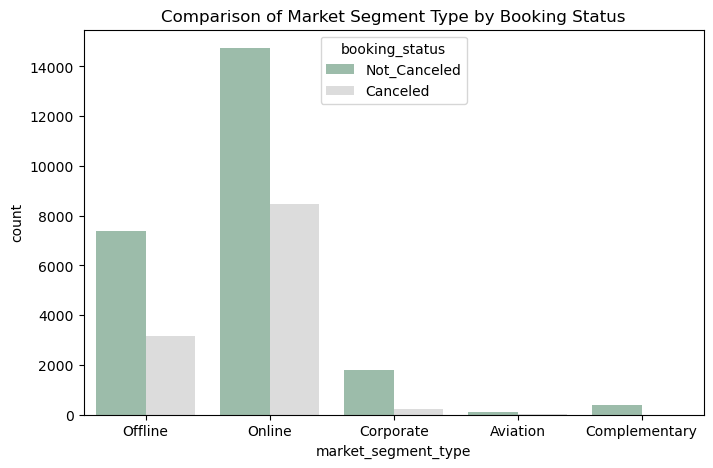

In [43]:
sns.countplot(x = df_hotel['market_segment_type'] , hue = df_hotel['booking_status'],palette = colors)
plt.title('Comparison of Market Segment Type by Booking Status')
plt.savefig("Comparison of Market Segment Type by Booking Status.jpeg")
plt.show()

#### No_of_week_nights vs Avg_price_per_room

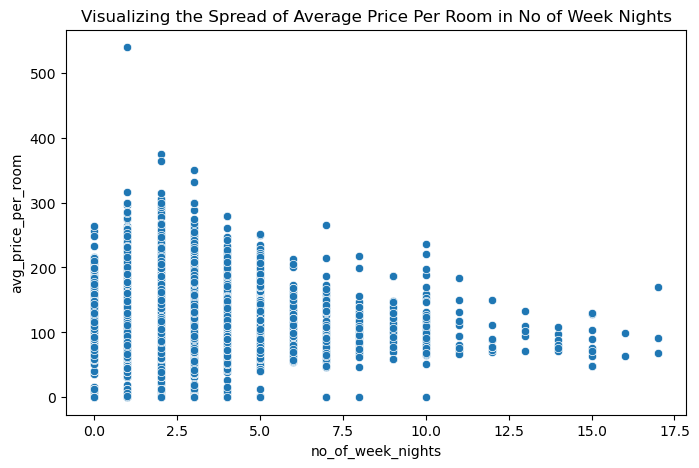

In [44]:
sns.scatterplot(x = df_hotel['no_of_week_nights'], y = df_hotel['avg_price_per_room'])
plt.title('Visualizing the Spread of Average Price Per Room in No of Week Nights')
plt.savefig('Visualizing the Spread of Average Price Per Room in No of Week Nights.jpeg')
plt.show()

#### No_of_weekend_nights vs Avg_price_per_room

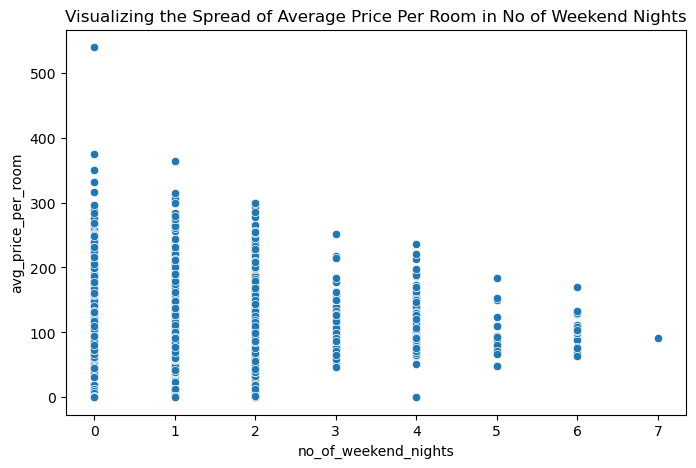

In [45]:
sns.scatterplot(x = df_hotel['no_of_weekend_nights'], y = df_hotel['avg_price_per_room'])
plt.title('Visualizing the Spread of Average Price Per Room in No of Weekend Nights')
plt.savefig('Visualizing the Spread of Average Price Per Room in No of Weekend Nights.jpeg')
plt.show()

### Multivariate Analysis

#### Type_of_meal_plan vs Avg_price_per_room vs Booking_status

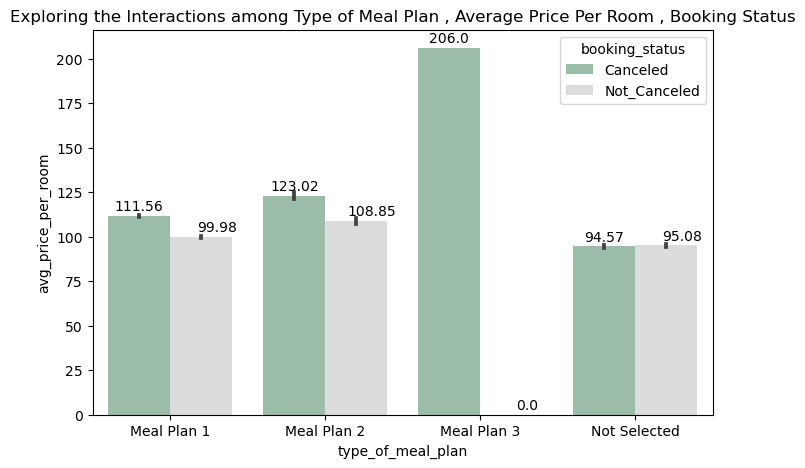

In [46]:
sns.barplot(x = df_hotel['type_of_meal_plan'].sort_values() , y = df_hotel['avg_price_per_room'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Type of Meal Plan , Average Price Per Room , Booking Status')

for i,v in enumerate(round(df_hotel.groupby(['type_of_meal_plan','booking_status']
                                           )['avg_price_per_room'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 3, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Type of Meal Plan , Average Price Per Room , Booking Status.jpeg')

#### Room_type_reserved vs Avg_price_per_room vs Booking_status

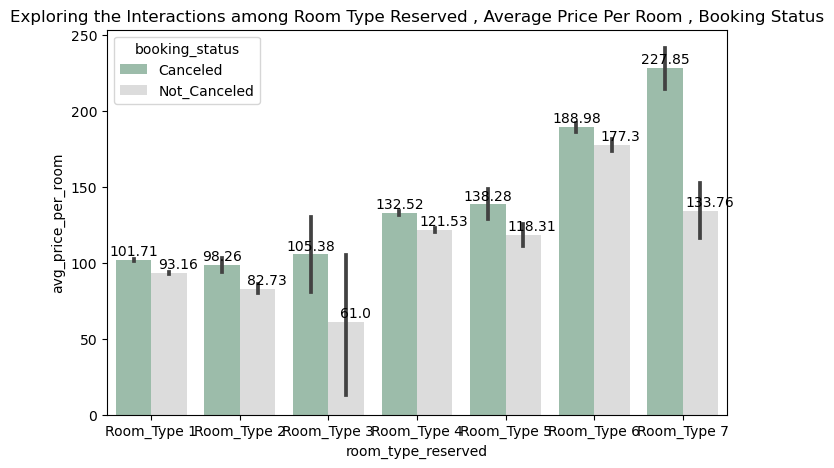

In [47]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['avg_price_per_room'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Room Type Reserved , Average Price Per Room , Booking Status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['avg_price_per_room'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 3, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Room Type Reserved , Average Price Per Room , Booking Status.jpeg')

#### Market_segment_type vs Avg_price_per_room vs Booking_status

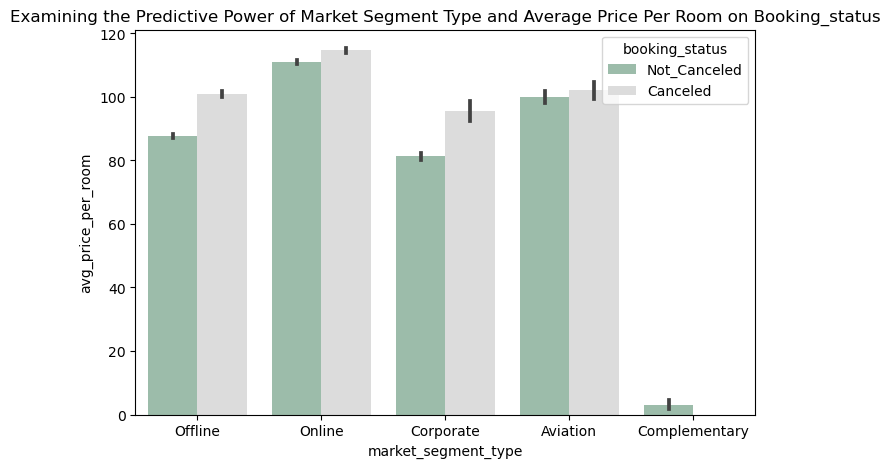

In [48]:
sns.barplot(x = df_hotel['market_segment_type'], y = df_hotel['avg_price_per_room'], hue = df_hotel['booking_status'], 
            palette = colors)
plt.title('Examining the Predictive Power of Market Segment Type and Average Price Per Room on Booking_status')
plt.savefig('Examining the Predictive Power of Market Segment Type and Average Price Per Room on Booking_status.jpeg')
plt.show()

#### Room_type_reserved vs No_of_weekend_nights vs Booking_status

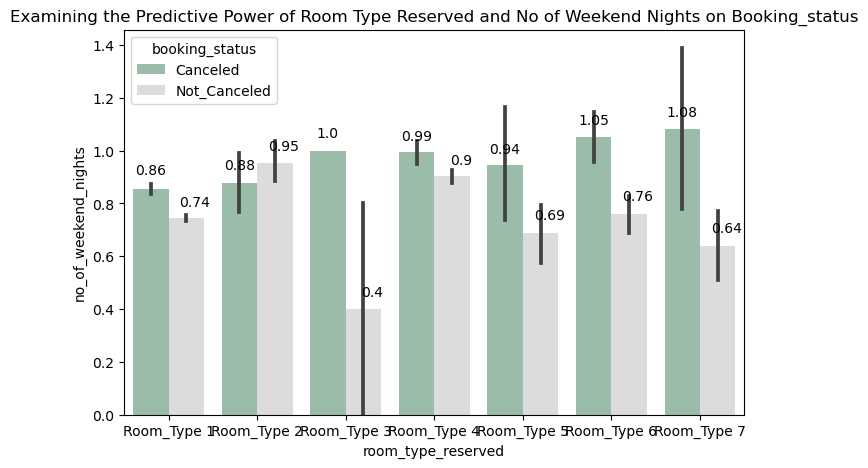

In [49]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['no_of_weekend_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Examining the Predictive Power of Room Type Reserved and No of Weekend Nights on Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['no_of_weekend_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')
    
plt.savefig('Examining the Predictive Power of Room Type Reserved and No of Weekend Nights on Booking_status.jpeg')

#### Room_type_reserved vs No_of_week_nights vs Booking_status

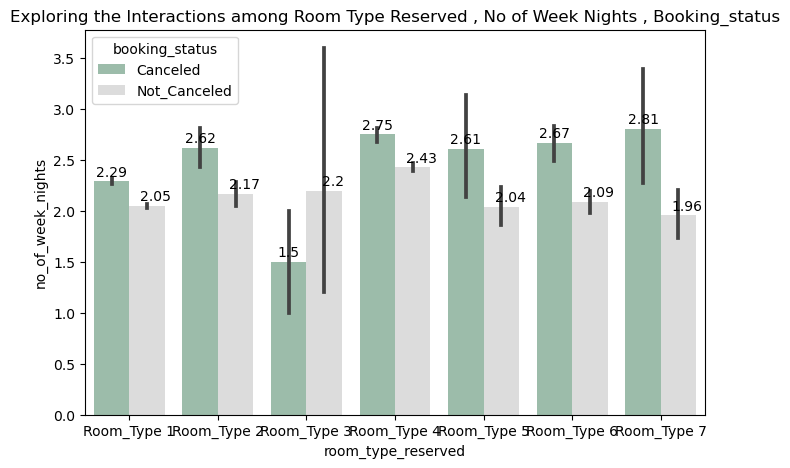

In [50]:
sns.barplot(x = df_hotel['room_type_reserved'].sort_values() , y = df_hotel['no_of_week_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Room Type Reserved , No of Week Nights , Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['room_type_reserved','booking_status']
                                           )['no_of_week_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')
    
plt.savefig('Exploring the Interactions among Room Type Reserved , No of Week Nights , Booking_status.jpeg')

#### Repeated_guest vs No_of_weekend_nights vs Booking_status

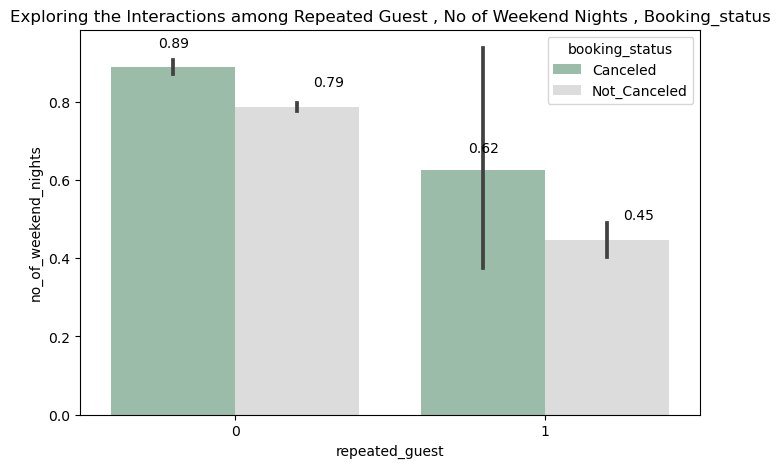

In [51]:
sns.barplot(x = df_hotel['repeated_guest'].sort_values() , y = df_hotel['no_of_weekend_nights'], 
           hue = df_hotel['booking_status'].sort_values(), palette = colors)

plt.title('Exploring the Interactions among Repeated Guest , No of Weekend Nights , Booking_status')

for i,v in enumerate(round(df_hotel.groupby(['repeated_guest','booking_status']
                                           )['no_of_weekend_nights'].mean(),2).sort_index()):
    plt.text(x = i-i/2 - 0.2, y = v + 0.05, s = v , ha = 'center')

plt.savefig('Exploring the Interactions among Repeated Guest , No of Weekend Nights , Booking_status.jpeg')

#### No_of_week_nights vs Avg_price_per_room vs Booking_status

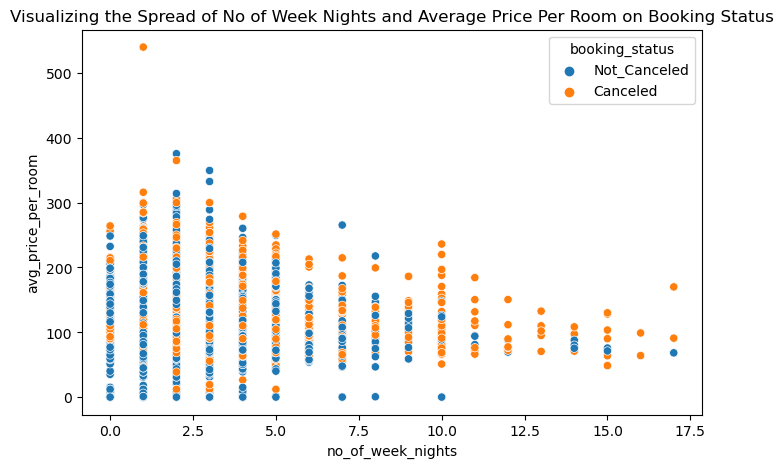

In [52]:
sns.scatterplot(x = df_hotel['no_of_week_nights'] , y = df_hotel['avg_price_per_room'], 
                hue = df_hotel['booking_status'])

plt.title('Visualizing the Spread of No of Week Nights and Average Price Per Room on Booking Status')
plt.savefig('Visualizing the Spread of No of Week Nights and Average Price Per Room on Booking Status.jpeg')

plt.show()

#### No_of_weekend_nights vs Avg_price_per_room vs Booking_status

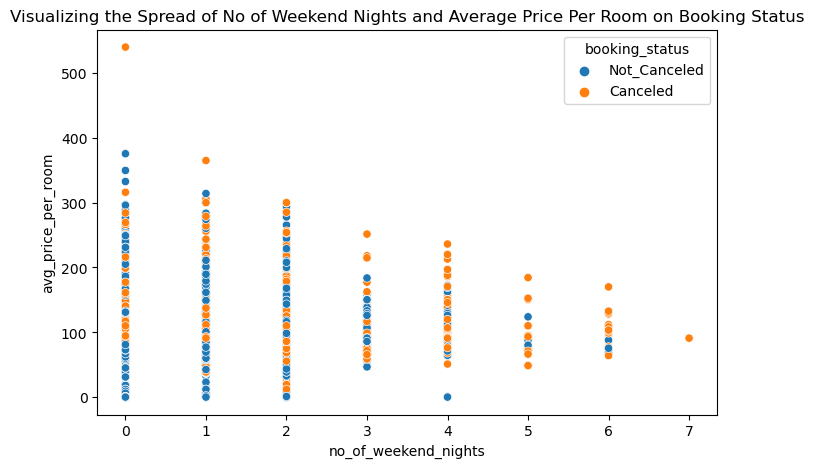

In [53]:
sns.scatterplot(x = df_hotel['no_of_weekend_nights'] , y = df_hotel['avg_price_per_room'], hue = df_hotel['booking_status'])
plt.title('Visualizing the Spread of No of Weekend Nights and Average Price Per Room on Booking Status')
plt.savefig('Visualizing the Spread of No of Weekend Nights and Average Price Per Room on Booking Status.jpeg')
plt.show()

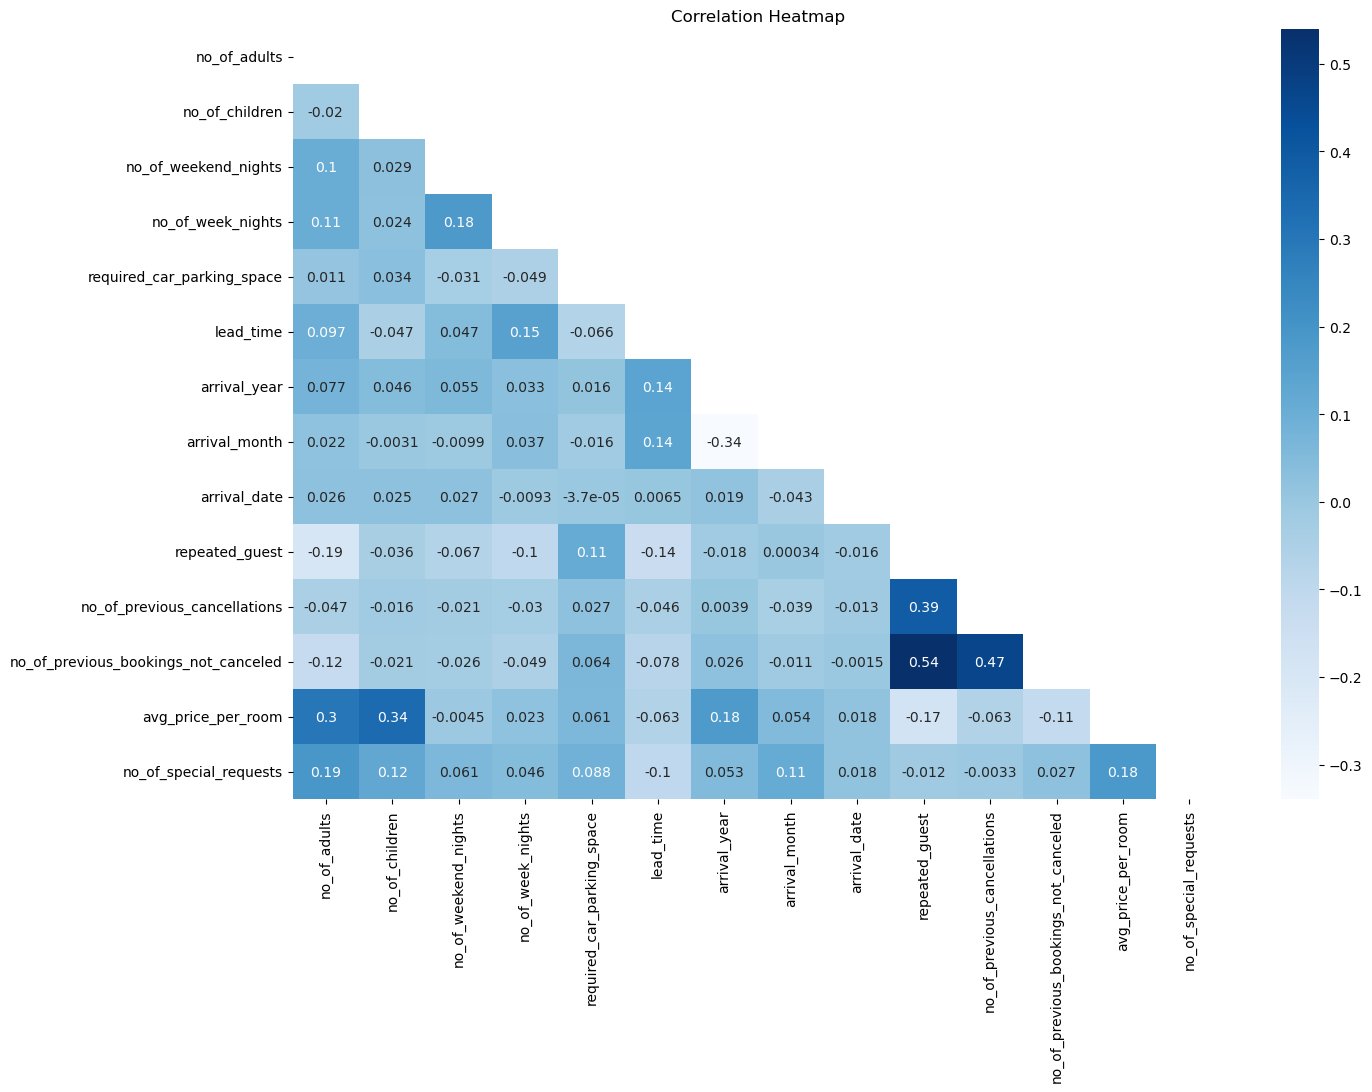

In [54]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(df_hotel.corr(), annot = True, cmap = "Blues" , mask = np.triu(df_hotel.corr()))
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.jpeg')
plt.show()

### Encoding of Categorical variables

In [55]:
df_hotel.select_dtypes(exclude=np.number).columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

#### Type_of_meal_plan

In [56]:
df_hotel['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

Type of meal plan variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Meal plan type affects the price of room. Each plan has different prices.

In [57]:
df_hotel.groupby('type_of_meal_plan')['avg_price_per_room'].mean().sort_values(ascending=False)

type_of_meal_plan
Meal Plan 2     115.306106
Meal Plan 1     103.593139
Not Selected     94.908610
Meal Plan 3      41.200000
Name: avg_price_per_room, dtype: float64

In [58]:
oe = OrdinalEncoder(categories = [['Meal Plan 2','Meal Plan 1','Not Selected', 'Meal Plan 3']])

df_hotel['type_of_meal_plan'] = oe.fit_transform(df_hotel[['type_of_meal_plan']])

df_hotel['type_of_meal_plan'].unique()

array([1., 2., 0., 3.])

#### Room_type_reserved

In [59]:
df_hotel['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

Room type variable is an ordinal categorical variable. It has a hierarchy between the subclasses. Different room price will be having different prices

In [60]:
df_hotel.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values(ascending=False)

room_type_reserved
Room_Type 6    182.212836
Room_Type 7    155.198291
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Name: avg_price_per_room, dtype: float64

In [61]:
oe = OrdinalEncoder(categories = [['Room_Type 6','Room_Type 7','Room_Type 4', 'Room_Type 5',
                                  'Room_Type 1','Room_Type 2','Room_Type 3']])

df_hotel['room_type_reserved'] = oe.fit_transform(df_hotel[['room_type_reserved']])

df_hotel['room_type_reserved'].unique()

array([4., 2., 5., 0., 3., 1., 6.])

#### Market_segment_type

In [62]:
df_hotel['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

Market segment type variable is an ordinal categorical variable. It has a hierarchy between the subclasses. For example when a corporate company does bulk booking there maybe slight discount in price of the room and for the customer who books through online has to pay more due to internet service charges , platform charges etc. Same can be applied also for other subclasses also

In [63]:
df_hotel.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

market_segment_type
Online           112.256855
Aviation         100.704000
Offline           91.632679
Corporate         82.911740
Complementary      3.141765
Name: avg_price_per_room, dtype: float64

From above groupby we can see that the prices for different market type the prices are different. There is an hierarchy followed

In [64]:
oe = OrdinalEncoder(categories = [['Online','Aviation','Offline','Corporate','Complementary']])

df_hotel['market_segment_type'] = oe.fit_transform(df_hotel[['market_segment_type']])

df_hotel['market_segment_type'].unique()

array([2., 0., 3., 1., 4.])

#### Booking_status

In [65]:
df_hotel['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

For booking status variable we can replace not_canceled with 0 and cancelled as 1

In [66]:
df_hotel['booking_status'].replace({'Not_Canceled':0,'Canceled':1}, inplace = True)

df_hotel['booking_status'].unique()

array([0, 1], dtype=int64)

In [67]:
df_hotel["arrival_year"].unique()

array([2017, 2018], dtype=int64)

In [68]:
df_hotel["arrival_year"].replace({2017: 0, 2018:1}, inplace=True)

In [69]:
df_hotel["arrival_year"].unique()

array([0, 1], dtype=int64)

### Performing hypothesis testing to find the significant variables

Hypothesis :

H0 : There is no significant relationship between the dependent and independent variable

Ha : There is significant relationship between the dependent and independent variable

Significance level :

Considering significance level as 0.05

In [70]:
# No_of_adults is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_adults'],df_hotel['booking_status'])

F_onewayResult(statistic=170661.32143072737, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no of adults and booking status

In [71]:
# No_of_children is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_children'],df_hotel['booking_status'])

F_onewayResult(statistic=4689.924901332799, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_children and booking status

In [72]:
# No_of_weekend_nights is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_weekend_nights'],df_hotel['booking_status'])

F_onewayResult(statistic=8653.25372049125, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_weekend_nights and booking status

In [73]:
# No_of_week_nights is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_week_nights'],df_hotel['booking_status'])

F_onewayResult(statistic=57783.23599875753, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_week_nights and booking status

In [74]:
# Type_of_meal_plan is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['type_of_meal_plan'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

(278.29490920586017,
 4.951915406087789e-60,
 3,
 array([[2.22216265e+03, 1.08283735e+03],
        [1.87152488e+04, 9.11975121e+03],
        [3.44922674e+03, 1.68077326e+03],
        [3.36181943e+00, 1.63818057e+00]]))

since pvalue is less than significance level, reject H0. There is significant relationship between type_of_meal_plan and booking status

In [75]:
# Required_car_parking_space is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['required_car_parking_space'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

(268.3884673400529,
 2.547649021543868e-60,
 1,
 array([[23634.26299104, 11516.73700896],
        [  755.73700896,   368.26299104]]))

since pvalue is less than significance level, reject H0. There is significant relationship between required_car_parking_space and booking status

In [76]:
# Room_type_reserved is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['room_type_reserved'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

(57.334951797907074,
 1.5627796772447422e-10,
 6,
 array([[6.49503515e+02, 3.16496485e+02],
        [1.06233494e+02, 5.17665059e+01],
        [4.07250806e+03, 1.98449194e+03],
        [1.78176430e+02, 8.68235700e+01],
        [1.89135961e+04, 9.21640386e+03],
        [4.65275810e+02, 2.26724190e+02],
        [4.70654721e+00, 2.29345279e+00]]))

since pvalue is less than significance level, reject H0. There is significant relationship between room_type_reserved and booking status

In [77]:
# Lead_time is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['lead_time'],df_hotel['booking_status'])

F_onewayResult(statistic=35412.96642027386, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between lead_time and booking status

In [78]:
# Market_segment_type is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['market_segment_type'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

(814.108865240557,
 6.748763024557236e-175,
 4,
 array([[15608.25527223,  7605.74472777],
        [   84.04548587,    40.95451413],
        [ 7078.64700207,  3449.35299793],
        [ 1356.15796003,   660.84203997],
        [  262.89427981,   128.10572019]]))

since pvalue is less than significance level, reject H0. There is significant relationship between market_segment_type and booking status

In [79]:
# Repeated_guest is a categorical column and Booking_status is categorical column.
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df_hotel['repeated_guest'], df_hotel['booking_status'])

stats.chi2_contingency(ge)

(416.09555137693894,
 1.7270504808167525e-92,
 1,
 array([[23764.70158511, 11580.29841489],
        [  625.29841489,   304.70158511]]))

since pvalue is less than significance level, reject H0. There is significant relationship between repeated_guest and booking status

In [80]:
# No_of_previous_cancellations is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_previous_cancellations'],df_hotel['booking_status'])

F_onewayResult(statistic=9435.529588299401, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_previous_cancellations and booking status

In [81]:
# No_of_previous_bookings_not_canceled is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_previous_bookings_not_canceled'],df_hotel['booking_status'])

F_onewayResult(statistic=333.9285623149284, pvalue=1.9702548785068815e-74)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_previous_bookings_not_canceled and booking status

In [82]:
# Avg_price_per_room is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['avg_price_per_room'],df_hotel['booking_status'])

F_onewayResult(statistic=313083.41245634214, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between avg_price_per_room and booking status

In [83]:
# No_of_special_requets is a numerical column and Booking_status is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df_hotel['no_of_special_requests'],df_hotel['booking_status'])

F_onewayResult(statistic=3689.3196365783297, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between no_of_special_requests and booking status

###### Insights from statistical tests
From above performed statistical tests we can conclude that none of the columns has failed to reject null hypotheses which means none of the columns are insignificant to the target variable booking_status. At this stage we cant drop any variable. On further progress after building few models and checking for their metrics if the performance is considerably low we can drop some columns based on the feature_importance score.

### Checking and treating of outliers¶

In [84]:
plt.rcParams["figure.figsize"] = [8,5]

In [85]:
num_cols = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
            'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room']

In [86]:
df_num =df_hotel[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time',
            'no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']]
df_num.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room
0,2,0,1,2,224,0,0,65.0


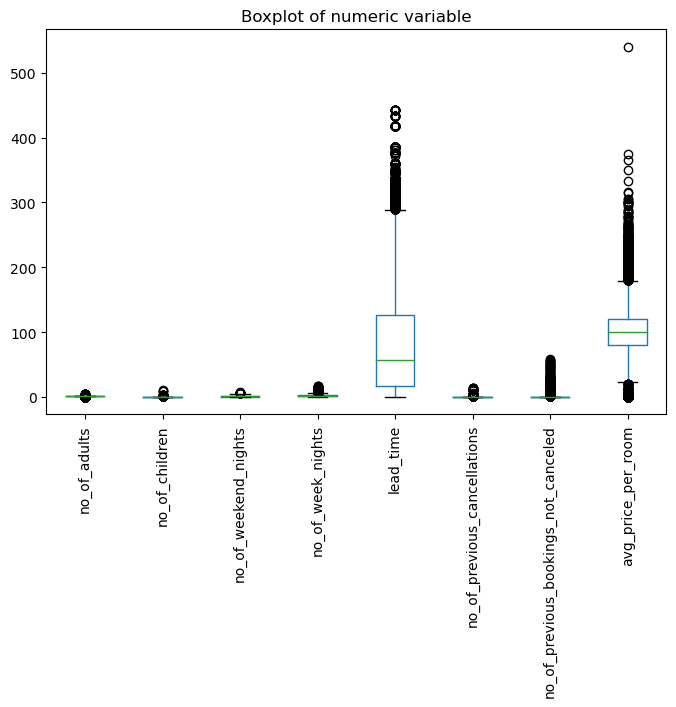

In [87]:
df_num.boxplot()
plt.title("Boxplot of numeric variable")
plt.grid()
plt.xticks(rotation = 90)
plt.savefig("Boxplot of numeric variable.jpeg")
plt.show()

#### No_of_adults

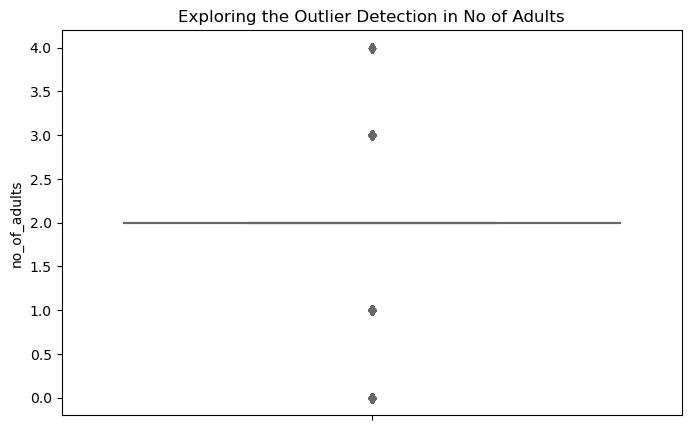

In [88]:
sns.boxplot(y = df_hotel['no_of_adults'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Adults')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [89]:
pt = PowerTransformer()

df_hotel['no_of_adults'] = pt.fit_transform(df_hotel[['no_of_adults']])

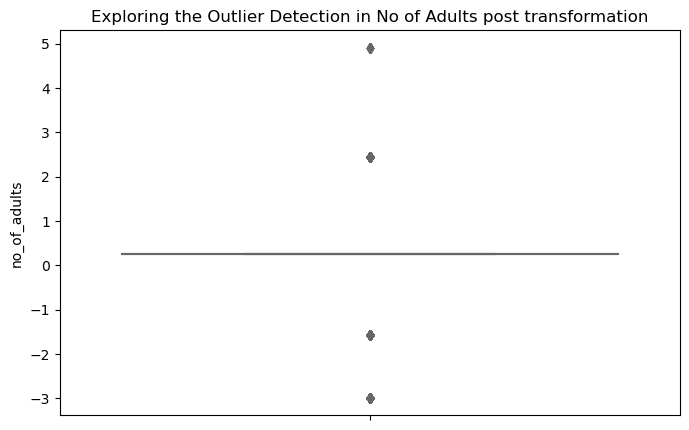

In [90]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_adults'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Adults post transformation')
plt.show()

#### No_of_children

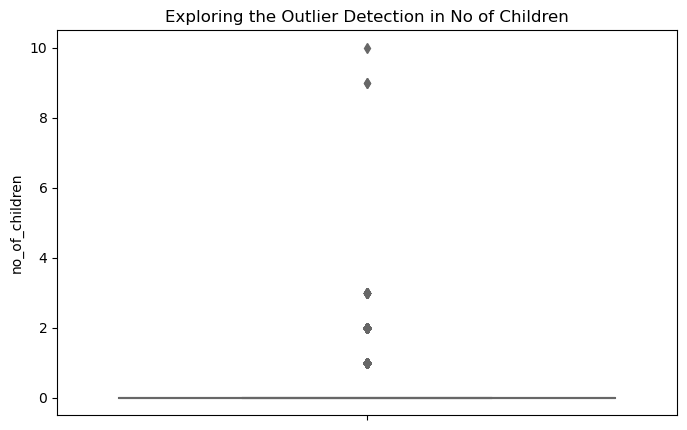

In [91]:
sns.boxplot(y = df_hotel['no_of_children'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Children')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [92]:
df_hotel['no_of_children'] = pt.fit_transform(df_hotel[['no_of_children']])

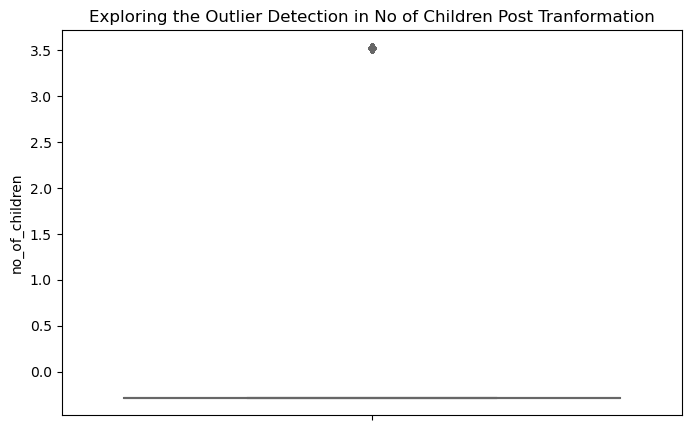

In [93]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_children'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Children Post Tranformation')
plt.show()

#### No_of_weekend_nights

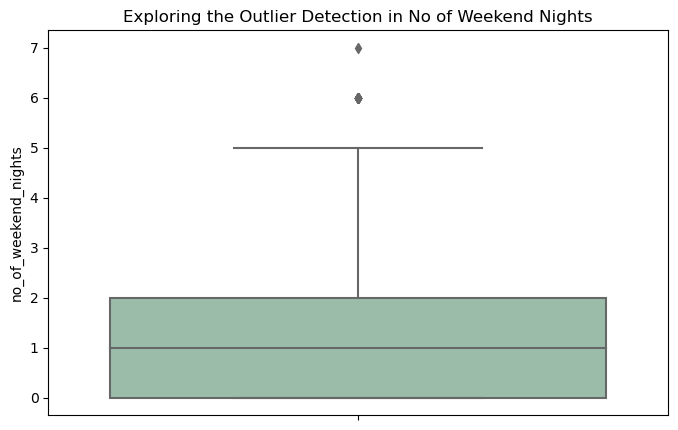

In [94]:
sns.boxplot(y = df_hotel['no_of_weekend_nights'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Weekend Nights')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [95]:
df_hotel['no_of_weekend_nights'] = pt.fit_transform(df_hotel[['no_of_weekend_nights']])

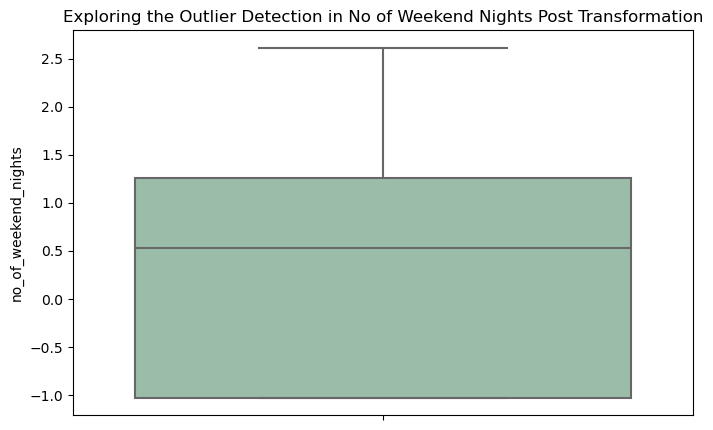

In [96]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_weekend_nights'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Weekend Nights Post Transformation')
plt.show()

#### No_of_week_nights

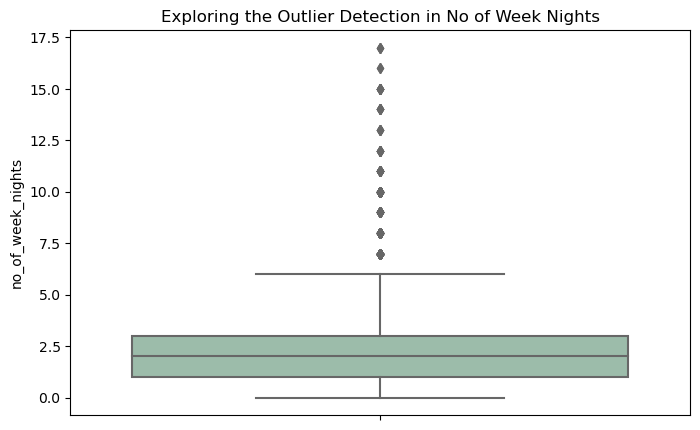

In [97]:
sns.boxplot(y = df_hotel['no_of_week_nights'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Week Nights')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [98]:
df_hotel['no_of_week_nights'] = pt.fit_transform(df_hotel[['no_of_week_nights']])

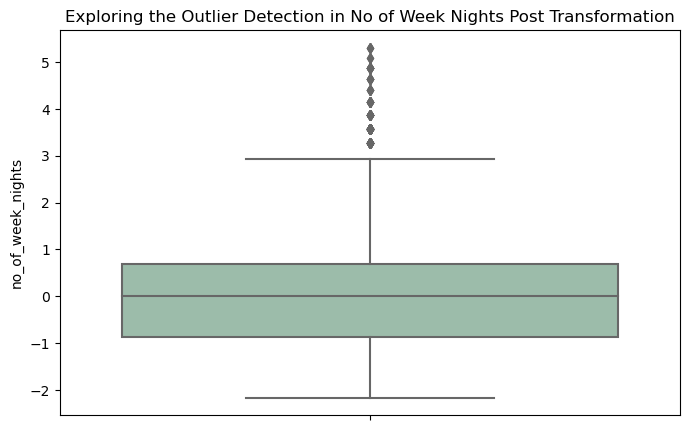

In [99]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_week_nights'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Week Nights Post Transformation')
plt.show()

#### Lead_time

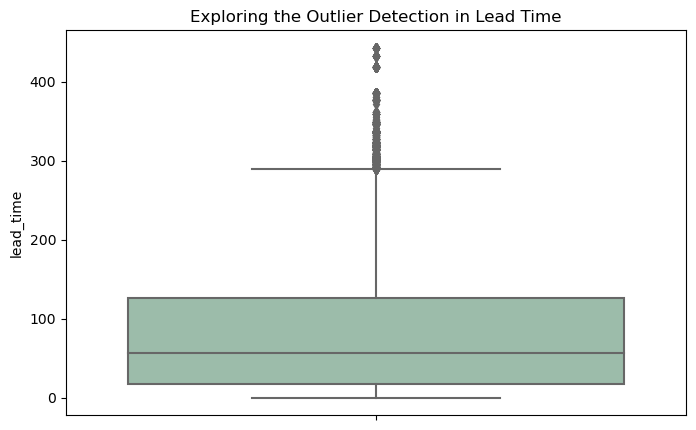

In [100]:
sns.boxplot(y = df_hotel['lead_time'],palette = colors)
plt.title('Exploring the Outlier Detection in Lead Time')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [101]:
df_hotel['lead_time'] = pt.fit_transform(df_hotel[['lead_time']])

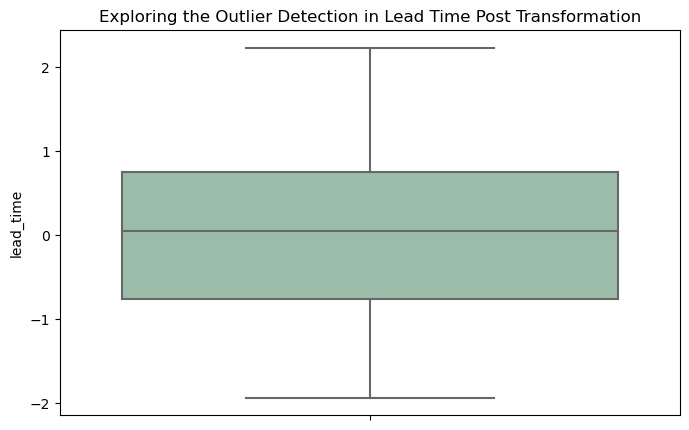

In [102]:
# After treating outliers 

sns.boxplot(y = df_hotel['lead_time'],palette = colors)
plt.title('Exploring the Outlier Detection in Lead Time Post Transformation')
plt.show()

#### No_of_previous_cancellations

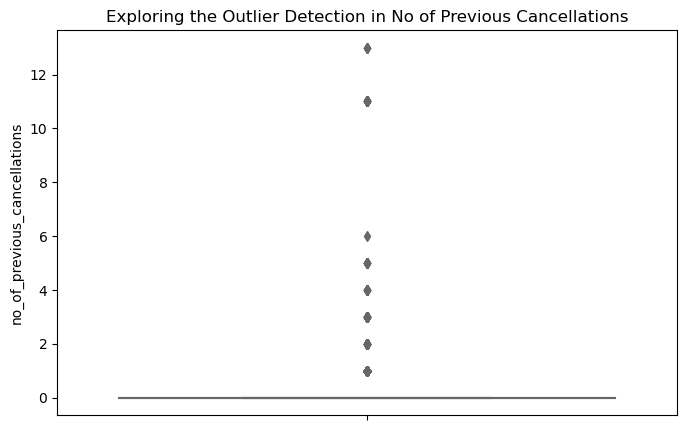

In [103]:
sns.boxplot(y = df_hotel['no_of_previous_cancellations'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Previous Cancellations')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [104]:
df_hotel['no_of_previous_cancellations'] = pt.fit_transform(df_hotel[['no_of_previous_cancellations']])

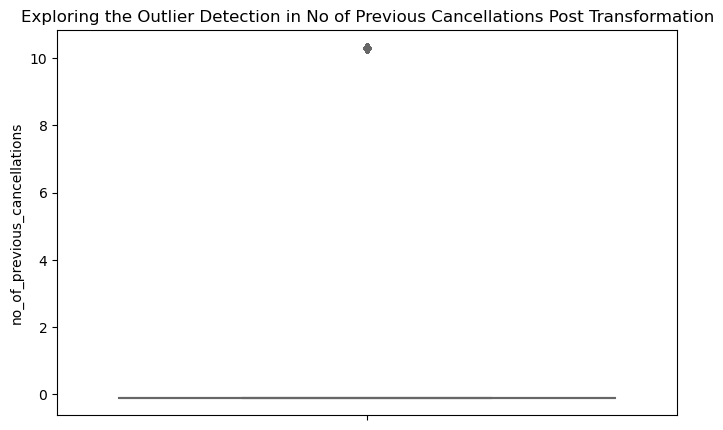

In [105]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_previous_cancellations'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Previous Cancellations Post Transformation')
plt.show()

#### No_of_previous_bookings_not_canceled

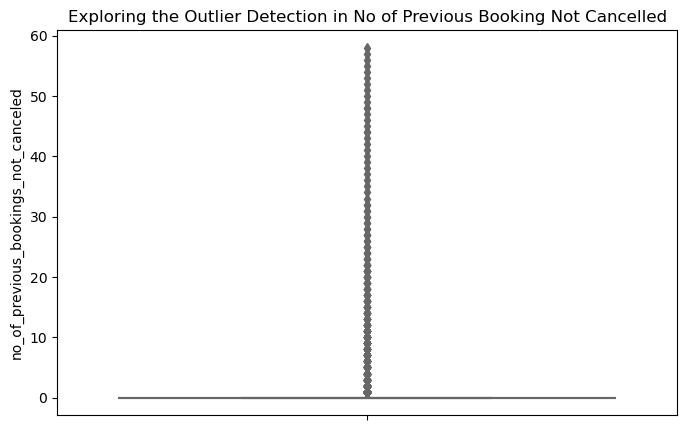

In [106]:
sns.boxplot(y = df_hotel['no_of_previous_bookings_not_canceled'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Previous Booking Not Cancelled')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [107]:
df_hotel['no_of_previous_bookings_not_canceled'] = pt.fit_transform(df_hotel[['no_of_previous_bookings_not_canceled']])

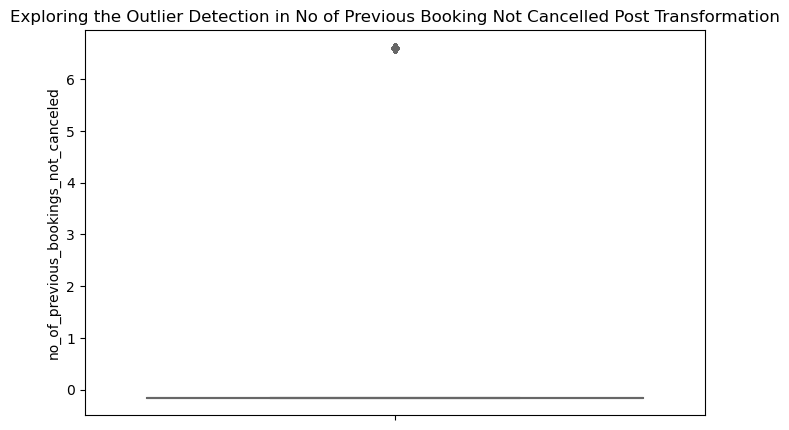

In [108]:
# After treating outliers 

sns.boxplot(y = df_hotel['no_of_previous_bookings_not_canceled'],palette = colors)
plt.title('Exploring the Outlier Detection in No of Previous Booking Not Cancelled Post Transformation')
plt.show()

#### Avg_price_per_room

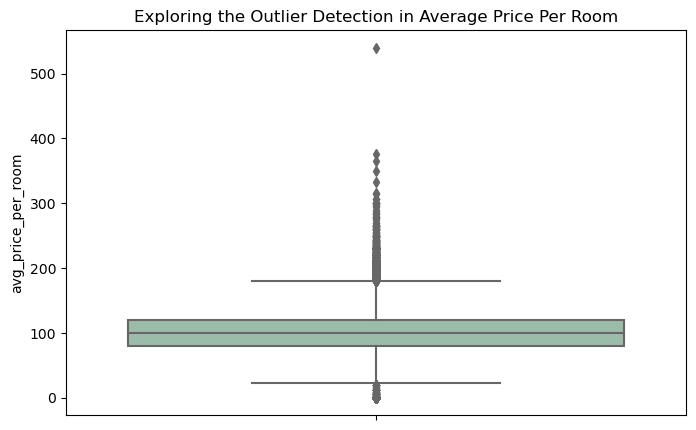

In [109]:
sns.boxplot(y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Exploring the Outlier Detection in Average Price Per Room')
plt.show()

From above plot it is clearly evident that there are outliers present. By doing IQR method we tend lose data. Hence we go forward by doing transformation technique

In [110]:
df_hotel['avg_price_per_room'] = pt.fit_transform(df_hotel[['avg_price_per_room']])

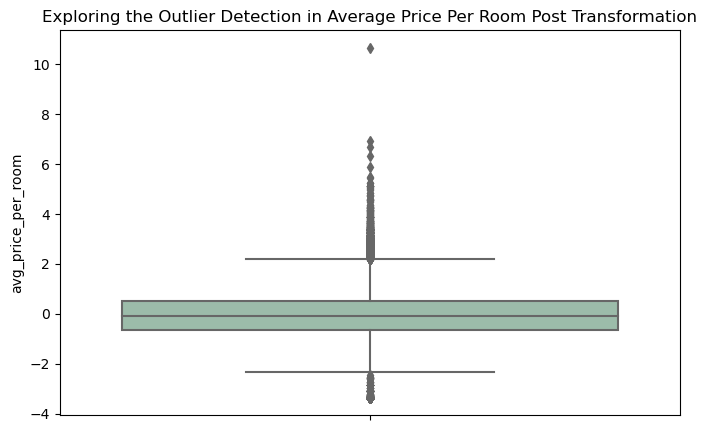

In [111]:
# After treating outliers 

sns.boxplot(y = df_hotel['avg_price_per_room'],palette = colors)
plt.title('Exploring the Outlier Detection in Average Price Per Room Post Transformation')
plt.show()

### Checking for imbalance in target variable

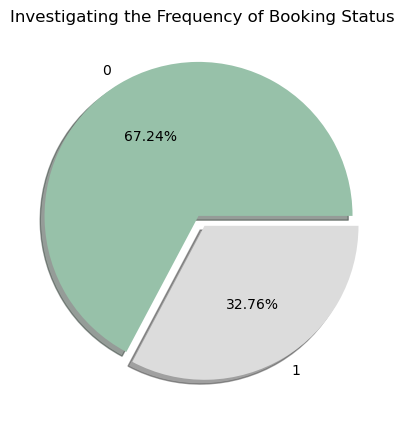

In [112]:
plt.pie(df_hotel['booking_status'].value_counts(), labels = df_hotel['booking_status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.05,0.025],colors = colors)
plt.title('Investigating the Frequency of Booking Status')
plt.show()

In [113]:
df_hotel['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

From above plot it is clearly evident that there is class imbalance in the target variable. In class 0 there is 24390 instances and 11885 instances in class 1. We can do over sampling technique to overcome this imblalance

### Oversampling technique using SMOTE

In [114]:
sm = SMOTE()

x = df_hotel.drop(columns = 'booking_status')
y = df_hotel['booking_status']

x_resampled , y_resampled = sm.fit_resample(x,y)

In [115]:
# Checking of instances after performing over sampling

y_resampled.value_counts()

0    24390
1    24390
Name: booking_status, dtype: int64

From above value counts we can see that class imbalance is rectified

### Splitting the dataset randomly into train and test dataset using ratio of 70:30 

In [116]:
xtrain , xtest , ytrain , ytest = train_test_split(x_resampled, y_resampled, test_size = 0.30, random_state = 7)

### Building a base model

Building a base model using Logistic Regression as it is having the highest explanatory power compared to other models

In [117]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

Optimization terminated successfully.
         Current function value: 0.452108
         Iterations 22


##### checking for summary

In [118]:
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                34146
Model:                          Logit   Df Residuals:                    34128
Method:                           MLE   Df Model:                           17
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.3477
Time:                        00:46:00   Log-Likelihood:                -15438.
converged:                       True   LL-Null:                       -23668.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.1806    3.5e+05   3.37e-06      1.000   -6.86e+05    6.86e+05
no_of_adults                            -0.0171      0.016     -1.045      0.296      -0.049       0.015
no_of_children                           0.0057      0.016      0.360      0.719      -0.025       0.037
no_of_weekend_nights                     0.0781      0.014      5.448      0.000       0.050       0.106
no_of_week_nights                       -0.0327      0.015     -2.222      0.026      -0.061      -0.004
type_of_meal_plan                        0.0878      0.035      2.529      0.011       0.020       0.156
required_car_parking_space              -1.9688      0.129    -15.220      0.000      -2.222      -1.715
room_type_reserved                       0.1925      0.018     10.435      0.000       0.156       0.229
lead_time                                1.3580      0.020     68.999      0.000       1.319       1.397
arrival_year                             0.4647      0.047      9.820      0.000       0.372       0.557
arrival_month                           -0.0327      0.005     -6.177      0.000      -0.043      -0.022
arrival_date                             0.0055      0.002      3.399      0.001       0.002       0.009
market_segment_type                     -0.7385      0.019    -39.195      0.000      -0.775      -0.702
repeated_guest                        -123.8592   3.76e+07   -3.3e-06      1.000   -7.36e+07    7.36e+07
no_of_previous_cancellations            11.7872   3.61e+06   3.27e-06      1.000   -7.07e+06    7.07e+06
no_of_previous_bookings_not_canceled     0.1676      0.097      1.725      0.085      -0.023       0.358
avg_price_per_room                       0.7077      0.023     31.167      0.000       0.663       0.752
no_of_special_requests                  -1.6325      0.025    -64.620      0.000      -1.682      -1.583
========================================================================================================
"""

In [128]:
# import time
# from PIL import Image

# time.sleep(3)

#### Calculating various metrics to evaluate the model performance

In [119]:
pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
pred_prob_test = model_lr.predict(sma.add_constant(xtest))

In [120]:
# Calculating youden's index to convert probability prediction to class prediction

# For train data

fpr , tpr , threshold = roc_curve(ytrain,pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))


# For test data

fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.58
Youdens index for test data is 0.59


In [121]:
# Converting probability prediction to class prediction using 0.59 as threshold value

pred_train = [ 1 if i > 0.59 else 0  for i in pred_prob_train]
pred_test = [ 1 if i > 0.59 else 0  for i in pred_prob_test]


<AxesSubplot:>

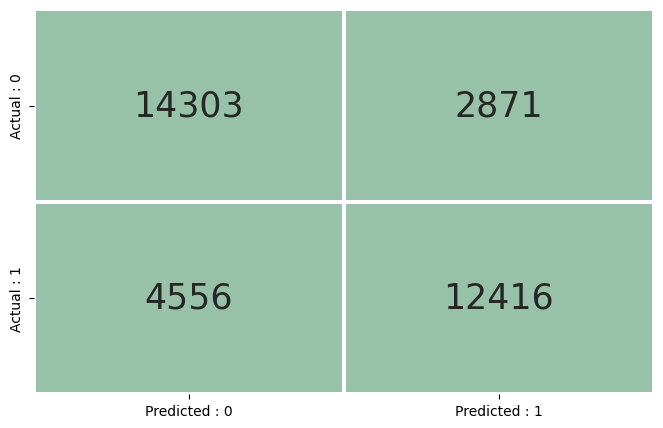

In [122]:
# plotting confusion matrix for train data

cm = confusion_matrix(ytrain,pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

<AxesSubplot:>

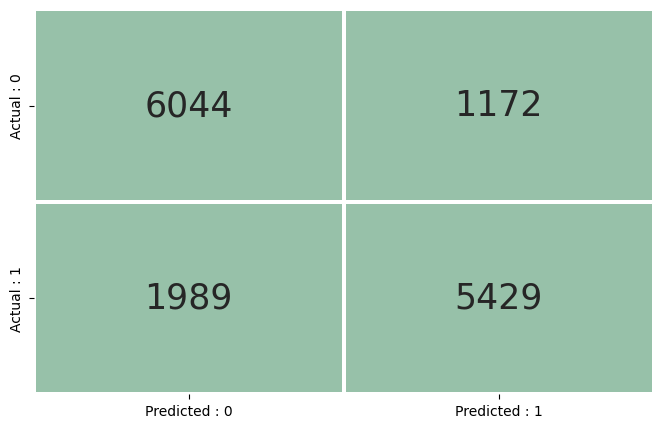

In [123]:
# plotting confusion matrix for test data

cm = confusion_matrix(ytest,pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])
c = ['#97C1A9']

sns.heatmap(data = conf_matrix, annot = True , cbar = False , fmt = 'd' , cmap = c , linewidth = 1.5 , 
           annot_kws = {'size' : 25})

In [124]:
# Classification report

print(f'Train report : \n{classification_report(ytrain,pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     17174
           1       0.81      0.73      0.77     16972

    accuracy                           0.78     34146
   macro avg       0.79      0.78      0.78     34146
weighted avg       0.79      0.78      0.78     34146


Testreport : 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      7216
           1       0.82      0.73      0.77      7418

    accuracy                           0.78     14634
   macro avg       0.79      0.78      0.78     14634
weighted avg       0.79      0.78      0.78     14634



From above report we can conclude that our base model has performed good in both train and unseen data with accuracy of almost 80%. On further progress we try to improve our performance by building other models, tuning their hyperparameters and selecting columns based on feature importance score

In [125]:
odds = pd.DataFrame(np.round(np.exp(model_lr.params),2))
odds.sort_values(by = 0 , ascending=False)

,0
no_of_previous_cancellations,131553.84
lead_time,3.89
const,3.26
avg_price_per_room,2.03
arrival_year,1.59
room_type_reserved,1.21
no_of_previous_bookings_not_canceled,1.18
type_of_meal_plan,1.09
no_of_weekend_nights,1.08
arrival_date,1.01


In [126]:
odds.sort_values(by = 0 , ascending=False)[0:8]

# the below extracted features has the highest influence on the target variable, according to the oddds ratio 

,0
no_of_previous_cancellations,131553.84
lead_time,3.89
const,3.26
avg_price_per_room,2.03
arrival_year,1.59
room_type_reserved,1.21
no_of_previous_bookings_not_canceled,1.18
type_of_meal_plan,1.09
